In [1]:
import pandas as pd

In [2]:
data_path = "data/apple_quality.csv"

apple_quality = pd.read_csv(data_path)

In [3]:
print(apple_quality.head())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity Quality  
0 -0.491590    good  
1 -0.722809    good  
2  2.621636     bad  
3  0.790723    good  
4  0.501984    good  


In [4]:
apple_quality = apple_quality.drop("A_id", axis=1)

yes_no_mapping = {'good': 1, 'bad': 0}
apple_quality.replace(yes_no_mapping, inplace=True)

In [5]:
X = apple_quality.drop("Quality", axis=1)
X = X.values

y = apple_quality["Quality"]
y = y.values

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

In [7]:
from sklearn.cluster import KMeans

In [8]:
knn_model = KMeans(n_clusters=3)

In [9]:
knn_model.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Get the train Root-Mean-Square-Error results
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
train_rmse = sqrt(mse)
print(train_rmse)

0.9696971176609736


In [11]:
# Get the test RMSE results
test_preds = knn_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds)
test_rmse = sqrt(test_mse)
print(test_rmse)

0.979157801378307


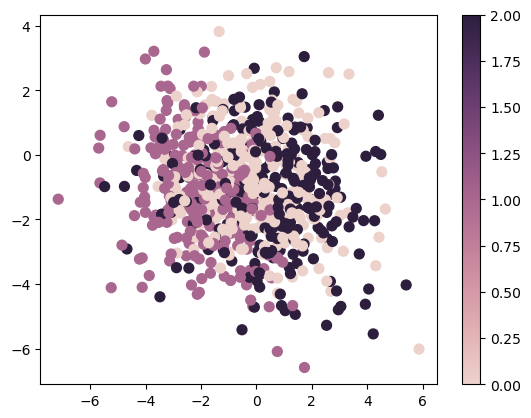

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the predictions
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

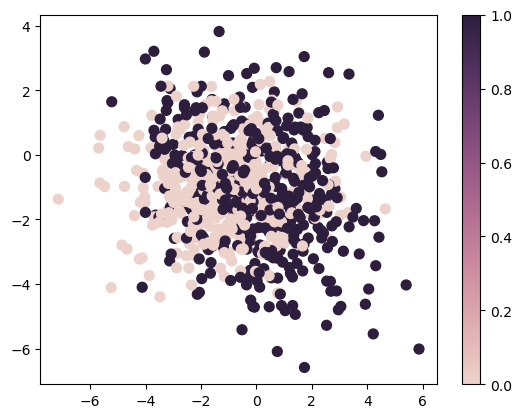

In [13]:
# Plot the actual data
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

## Time to optimize and improve the K-Means model.  
First we will have to get the Best N-Clusters for this dataset.

In [14]:
from sklearn.model_selection import GridSearchCV

# Search from N-Neighbors from 1 to 50
parameters = {"n_clusters": range(1, 50)}
gridsearch = GridSearchCV(KMeans(), parameters)
gridsearch.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

GridSearchCV(estimator=KMeans(), param_grid={'n_clusters': range(1, 50)})

In [15]:
print(gridsearch.best_params_)

{'n_clusters': 49}


In [16]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
print(train_rmse)

27.55581268081201


In [17]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print(test_rmse)

27.42662939553455


After doing the grid search, there is no improvement for the KNN model.

Before: 0.291070819942883

After: 0.27876961814372814

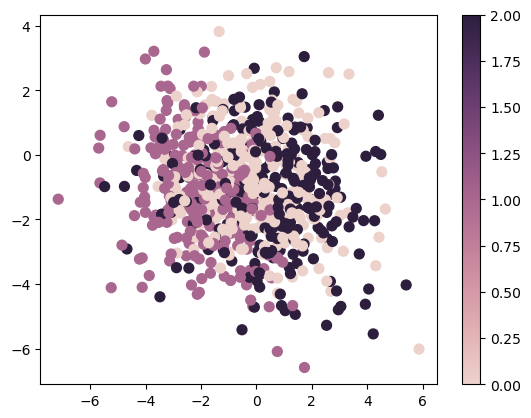

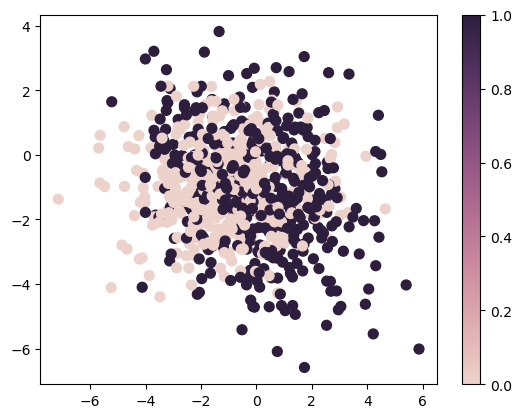

In [18]:
# Plot the new predictions and new test data
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()